<a href="https://colab.research.google.com/github/JuanOpizzi/Datos-2020-2c/blob/master/tp_inicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 arranque


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns

df_data = pd.read_csv("tp-2020-2c-train-cols2.csv")
df_decision = pd.read_csv("tp-2020-2c-train-cols1.csv")

In [ ]:
df_data.head()

tipo_de_sala                   nombre  id_usuario  genero  edad  amigos  \
0           4d       Señor Camilo Pedro         117  hombre  73.5       0   
1           4d   Señora Raquel Angelica         658   mujer  35.0       1   
2       normal   Señor Antonio Federico         794  hombre   NaN       0   
3           4d  Señor Osvaldo Aureliano         455  hombre   NaN       0   
4           4d    Señorita Rita Eudosia         173   mujer   4.0       1   

   parientes id_ticket  precio_ticket fila        nombre_sede  
0          0    59258;              1  NaN    fiumark_quilmes  
1          1    586:6;              2  NaN    fiumark_quilmes  
2          0  RE"39822              3  NaN  fiumark_chacarita  
3          0  C17"4:39              1  NaN    fiumark_palermo  
4          1    569964              2  NaN    fiumark_palermo

In [ ]:
df_decision.head()

id_usuario  volveria
0         117         0
1         658         0
2         794         0
3         455         0
4         173         1

In [ ]:
df = pd.merge(df_data, df_decision, how='inner', left_on='id_usuario', right_on='id_usuario')
df = df.drop(['id_usuario', 'id_ticket'], axis=1)
df.head()

tipo_de_sala                   nombre  genero  edad  amigos  parientes  \
0           4d       Señor Camilo Pedro  hombre  73.5       0          0   
1           4d   Señora Raquel Angelica   mujer  35.0       1          1   
2       normal   Señor Antonio Federico  hombre   NaN       0          0   
3           4d  Señor Osvaldo Aureliano  hombre   NaN       0          0   
4           4d    Señorita Rita Eudosia   mujer   4.0       1          1   

   precio_ticket fila        nombre_sede  volveria  
0              1  NaN    fiumark_quilmes         0  
1              2  NaN    fiumark_quilmes         0  
2              3  NaN  fiumark_chacarita         0  
3              1  NaN    fiumark_palermo         0  
4              2  NaN    fiumark_palermo         1

In [ ]:
sns.set()

In [ ]:
sns.__version__

'0.11.0'

In [ ]:
from pandas_profiling import ProfileReport

report = ProfileReport(
    df, title='Encuesta de sueldos sysarmy 2020.02', explorative=True, lazy=False
)

In [ ]:
report.to_notebook_iframe()

De esta vista rapido de pandas profiling podemos ver algunas cosas interesantes, filas tiene un monton de missing values
y edad tiene unos pocos de estos. Por otro lado no se repiten nombres, y en general, en el resto de filas no faltan valores 
(a primera vista), hay 2 generos, 3 sedes, etc.

1) Cuales fueron las preguntas que se hicieron inicialmente?

Bueno, viendo las preguntas de la encuesta, las preguntas que nos hacemos son:

    a) El tipo de sala al que el cliente fue, influye en su decision?
        Puede ser que un mejor servicio influya en la decision de las personas?
        Puede ser que alguien la haya pasado bien y volveria por, por ejemplo, ver Frozen 4 en una sala 4d?
    b) El precio que pago, influye? 
        La gente volveria a ver la pelicula si el precio le es apropiado?
        Una entrada cara, influye negativamente en la opinion de los clientes de la pelicula?
    c) El cliente volveria a ir por mas que no le gustara la pelicula si a sus amigos o familiares van a ver Frozen 4?
        Por mas que a un cliente no le guste la pelicula, es probable que si a su circulo cercano, le gusto la pelicula, lo influya
        en volver a ir para ver Frozen 4.
    d) El genero y\o edad de la persona influye en si le gusto la pelicula o no? 
        Hay una relacion directa entre el genero o edad de la persona y sus gustos personales?
    e) El asiento en el que estuvo el cliente, afecta su decision?
        Un asiento bien ubicado para un cliente no deberia ser razon para que la persona le guste la pelicula, pero un mal
        asiento si puede influir negativamente en la opinion de un cliente, por ejemplo: estar viendo desde un mal angulo una pelicula
        tiene sentido que genere un rechazo del cliente en la pelicula.
    f) Los clientes de alguna sede son mas propensos a que le guste Frozen?
    

In [ ]:
df.isnull().sum()

tipo_de_sala       0
nombre             0
genero             0
edad             160
amigos             0
parientes          0
precio_ticket      0
fila             624
nombre_sede        2
volveria           0
dtype: int64

# Muestra de edades

In [ ]:
df["edad"].value_counts(sort=True, ascending=True)

73.50     1
3.67      1
83.00     1
37.50     1
26.50     1
         ..
31.00    23
21.00    23
25.00    25
22.00    25
27.00    28
Name: edad, Length: 84, dtype: int64

In [ ]:
df['edad'] = df.edad.round()
df["edad"].value_counts(sort=True, ascending=True, bins=20)

(79.0, 83.0]     1
(75.0, 79.0]     1
(67.0, 71.0]     3
(71.0, 75.0]     5
(63.0, 67.0]     9
(59.0, 63.0]    10
(7.0, 11.0]     12
(11.0, 15.0]    14
(55.0, 59.0]    15
(51.0, 55.0]    25
(15.0, 19.0]    29
(43.0, 47.0]    32
(2.919, 7.0]    33
(47.0, 51.0]    33
(39.0, 43.0]    38
(35.0, 39.0]    69
(31.0, 35.0]    73
(19.0, 23.0]    75
(27.0, 31.0]    77
(23.0, 27.0]    87
Name: edad, dtype: int64

In [ ]:
#df.edad = df.astype({'edad': 'int32'}, errors='ignore').dtypes
#df['edad'].astype('int64', errors='ignore')
#df.head()

In [ ]:
df.edad.value_counts()

27.0    28
25.0    25
22.0    25
21.0    23
31.0    23
        ..
77.0     1
66.0     1
62.0     1
56.0     1
83.0     1
Name: edad, Length: 71, dtype: int64

In [ ]:
df['volveria'].replace({0: 'No', 1: 'Si'}, inplace=True)

In [ ]:
df_volveria = df[(df['volveria'] == 'Si')]
df_volveria.head()

tipo_de_sala                          nombre  genero  edad  amigos  \
4            4d           Señorita Rita Eudosia   mujer   4.0       1   
8        normal  Señor Carlos Roberto Francisco  hombre  41.0       1   
9        normal          Señora Lidia Barbarita   mujer  59.0       0   
13           3d         Señora Bernarda Agapita   mujer  45.0       0   
14           4d       Señor Rubens Carlos Randy  hombre  29.0       0   

    parientes  precio_ticket      fila        nombre_sede volveria  
4           1              2       NaN    fiumark_palermo       Si  
8           0              9  adelante    fiumark_palermo       Si  
9           1              9  adelante  fiumark_chacarita       Si  
13          0              2       NaN    fiumark_palermo       Si  
14          0              6       NaN    fiumark_palermo       Si

In [ ]:
df_no_volveria = df[(df['volveria'] == 'No')]
df_no_volveria.head()

tipo_de_sala                   nombre  genero  edad  amigos  parientes  \
0           4d       Señor Camilo Pedro  hombre  74.0       0          0   
1           4d   Señora Raquel Angelica   mujer  35.0       1          1   
2       normal   Señor Antonio Federico  hombre   NaN       0          0   
3           4d  Señor Osvaldo Aureliano  hombre   NaN       0          0   
5       normal   Señor Raimundo Longino  hombre   NaN       0          0   

   precio_ticket      fila        nombre_sede volveria  
0              1       NaN    fiumark_quilmes       No  
1              2       NaN    fiumark_quilmes       No  
2              3       NaN  fiumark_chacarita       No  
3              1       NaN    fiumark_palermo       No  
5              4  adelante    fiumark_palermo       No

/home/juan/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/juan/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
No handles with labels found to put in legend.


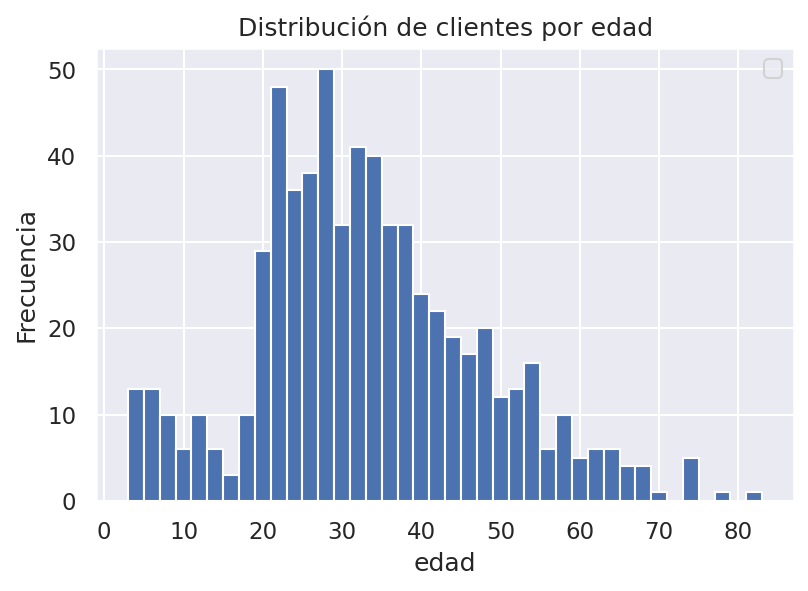

In [ ]:
plt.figure(dpi=150)

plt.hist(df['edad'], bins=40)

plt.title("Distribución de clientes por edad")
plt.ylabel("Frecuencia")
plt.xlabel("edad")
plt.legend()
plt.show()

In [ ]:
# VER SI USAR ESTO DSP
#df2 = df.groupby(['nombre', 'edad'])['nombre'].count().unstack('edad')
#df2[['volvera']].plot(kind='bar', stacked=True)

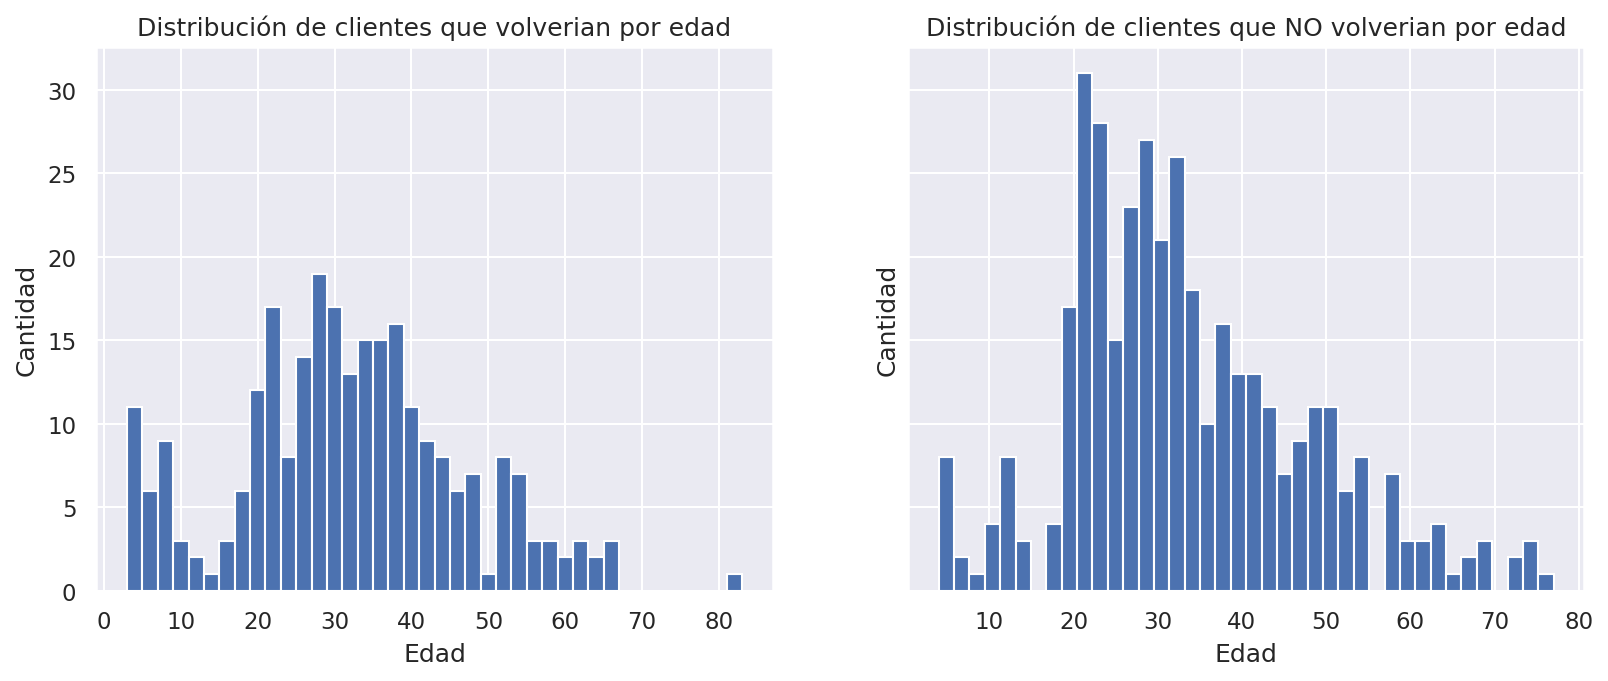

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, dpi=150, figsize=(6.4 * 2, 4.8))

axes[0].hist(df_volveria['edad'], bins=40)
axes[0].set_title("Distribución de clientes que volverian por edad")
axes[0].set_xlabel("Edad")
axes[0].set_ylabel("Cantidad")

axes[1].hist(df_no_volveria['edad'], bins=40)
axes[1].set_title("Distribución de clientes que NO volverian por edad")
axes[1].set_xlabel("Edad")
axes[1].set_ylabel("Cantidad")

plt.show()

In [ ]:
over15 = df.edad.value_counts() > 15
edades_over15 = df.edad.value_counts()[over15]
edades_over15

27.0    28
25.0    25
22.0    25
21.0    23
31.0    23
33.0    22
28.0    22
24.0    21
39.0    20
32.0    18
38.0    18
34.0    18
36.0    17
19.0    17
29.0    16
30.0    16
Name: edad, dtype: int64

In [ ]:
df_grueso_clientes = df[df.edad.isin(edades_over15.index)]
df_grueso_clientes.head()

tipo_de_sala                     nombre  genero  edad  amigos  parientes  \
7            4d      Señor Carlos Gregorio  hombre  32.0       0          0   
11           4d    Señor Ernesto Reginaldo  hombre  27.0       0          0   
12           4d     Señor Paulino Virgilio  hombre  34.0       0          0   
14           4d  Señor Rubens Carlos Randy  hombre  29.0       0          0   
17           4d    Señorita Alicia Augusta   mujer  24.0       0          0   

    precio_ticket fila      nombre_sede volveria  
7               1  NaN  fiumark_palermo       No  
11              1  NaN  fiumark_palermo       No  
12              1  NaN  fiumark_palermo       No  
14              6  NaN  fiumark_palermo       Si  
17              1  NaN  fiumark_palermo       Si

In [ ]:
df_grueso_clientes['cont_edad_genero'] = 1
df_grueso_clientes['cont_edad_sede'] = 1
df_grueso_clientes['cont_edad_sala'] = 1
df_grueso_clientes['cont_volvera'] = 1
df_grueso_clientes['cant_acompañado'] = df_grueso_clientes['parientes'] + df_grueso_clientes['amigos']
df_grueso_clientes.head()

<ipython-input-21-43151484733a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grueso_clientes['cont_edad_genero'] = 1
<ipython-input-21-43151484733a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grueso_clientes['cont_edad_sede'] = 1
<ipython-input-21-43151484733a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

tipo_de_sala                     nombre  genero  edad  amigos  parientes  \
7            4d      Señor Carlos Gregorio  hombre  32.0       0          0   
11           4d    Señor Ernesto Reginaldo  hombre  27.0       0          0   
12           4d     Señor Paulino Virgilio  hombre  34.0       0          0   
14           4d  Señor Rubens Carlos Randy  hombre  29.0       0          0   
17           4d    Señorita Alicia Augusta   mujer  24.0       0          0   

    precio_ticket fila      nombre_sede volveria  cont_edad_genero  \
7               1  NaN  fiumark_palermo       No                 1   
11              1  NaN  fiumark_palermo       No                 1   
12              1  NaN  fiumark_palermo       No                 1   
14              6  NaN  fiumark_palermo       Si                 1   
17              1  NaN  fiumark_palermo       Si                 1   

    cont_edad_sede  cont_edad_sala  cont_volvera  cant_acompañado  
7                1               1             1                0  
11               1               1             1                0  
12               1               1             1                0  
14               1               1             1                0  
17               1               1             1                0

In [ ]:
df_grueso_clientes['cant_acompañado'].value_counts()

0    214
1     59
2     34
3     12
4      5
5      4
7      1
Name: cant_acompañado, dtype: int64

In [ ]:
df_edad_genero = df_grueso_clientes.loc[:, ['edad', 'genero', 'cont_edad_genero']].groupby(by=["edad", "genero"]).sum()
df_edad_genero.columns = ['cont_edad_genero']

In [ ]:
df_edad_genero = df_edad_genero.unstack()

In [ ]:
df_edad_genero

cont_edad_genero      
genero           hombre mujer
edad                         
19.0                 11     6
21.0                 11    12
22.0                 18     7
24.0                 14     7
25.0                 13    12
27.0                 13    15
28.0                 17     5
29.0                 11     5
30.0                 11     5
31.0                 16     7
32.0                 12     6
33.0                 13     9
34.0                 10     8
36.0                 10     7
38.0                 10     8
39.0                 13     7

Text(0.5, 0, 'Edad')

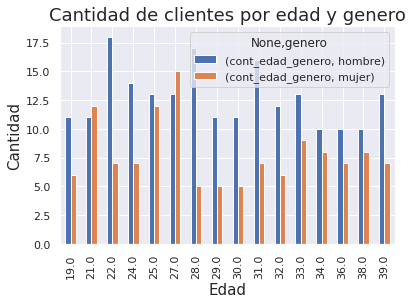

In [ ]:
'''
Grafico de barras de clientes por edad y genero.
'''
g = df_edad_genero.plot.bar()
g.set_title("Cantidad de clientes por edad y genero", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Edad", fontsize=15)

In [ ]:
df_edad_sede = df_grueso_clientes.loc[:, ['edad', 'nombre_sede', 'cont_edad_sede']].groupby(by=["edad", "nombre_sede"]).sum()
df_edad_sede.columns = ['cont_edad_sede']
df_edad_sede = df_edad_sede.unstack()
df_edad_sede

cont_edad_sede                                
nombre_sede fiumark_chacarita fiumark_palermo fiumark_quilmes
edad                                                         
19.0                      1.0            14.0             2.0
21.0                      4.0            18.0             1.0
22.0                      1.0            22.0             2.0
24.0                      1.0            18.0             2.0
25.0                      4.0            20.0             1.0
27.0                      7.0            21.0             NaN
28.0                      3.0            18.0             1.0
29.0                      2.0            14.0             NaN
30.0                      4.0            12.0             NaN
31.0                      2.0            21.0             NaN
32.0                      3.0            14.0             1.0
33.0                      7.0            14.0             1.0
34.0                      2.0            14.0             2.0
36.0                      3.0            13.0             1.0
38.0                      4.0            14.0             NaN
39.0                      3.0            17.0             NaN

Text(0.5, 0, 'Edad')

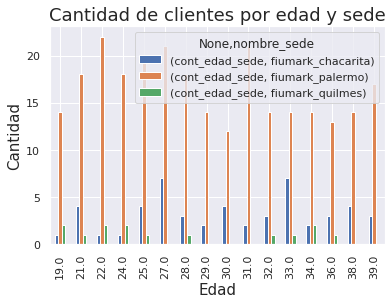

In [ ]:
'''
Grafico de barras de clientes por edad y sede.
'''
g = df_edad_sede.plot.bar()
g.set_title("Cantidad de clientes por edad y sede", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Edad", fontsize=15)

In [ ]:
df_edad_sala = df_grueso_clientes.loc[:, ['edad', 'tipo_de_sala', 'cont_edad_sala']].groupby(by=["edad", "tipo_de_sala"]).sum()
df_edad_sala.columns = ['cont_edad_sala']
df_edad_sala = df_edad_sala.unstack()
df_edad_sala

cont_edad_sala           
tipo_de_sala             3d  4d normal
edad                                  
19.0                      2  12      3
21.0                      5  14      4
22.0                      6  14      5
24.0                      3  15      3
25.0                      2  18      5
27.0                     10  11      7
28.0                      7  13      2
29.0                      2  12      2
30.0                      4   8      4
31.0                      8  11      4
32.0                      5  11      2
33.0                      6  10      6
34.0                      5   9      4
36.0                      5   8      4
38.0                      3   7      8
39.0                      7   5      8

Text(0.5, 0, 'Edad')

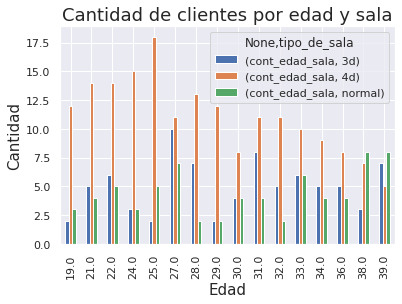

In [ ]:
'''
Grafico de barras de clientes por edad y sala.
'''
g = df_edad_sala.plot.bar()
g.set_title("Cantidad de clientes por edad y sala", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Edad", fontsize=15)

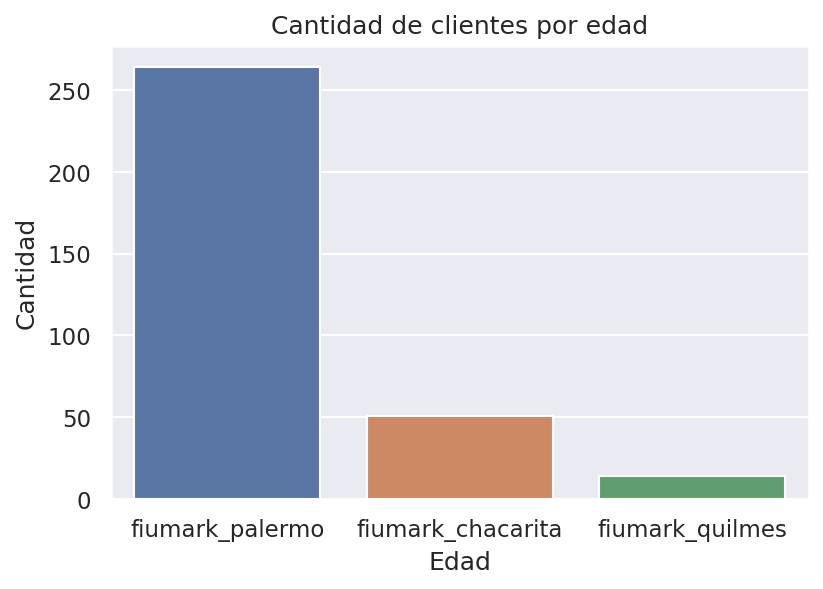

In [ ]:
plt.figure(dpi=150)
sns.countplot(
    x="nombre_sede", data=df_grueso_clientes, order=df_grueso_clientes["nombre_sede"].value_counts().iloc[:20].index
)
plt.ylabel("Cantidad")
plt.xlabel("Edad")
plt.title("Cantidad de clientes por edad")
plt.xticks(rotation=0)
plt.show()

In [ ]:
df["amigos"].value_counts(sort=True, ascending=True)

5      5
8      6
3     14
4     15
2     25
1    179
0    557
Name: amigos, dtype: int64

In [ ]:
df["parientes"].value_counts(sort=True, ascending=True)

6      1
4      4
5      4
3      5
2     70
1    110
0    607
Name: parientes, dtype: int64

# Veo la distribucion de la gente de con quien va al cine

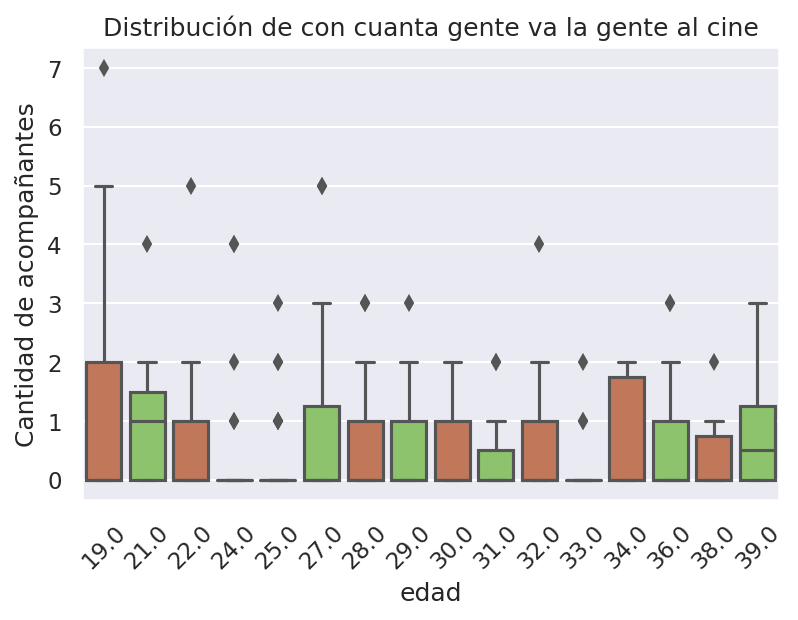

In [ ]:
plt.figure(dpi=150)
plt.title("Distribución de con cuanta gente va la gente al cine")
sns.boxplot(
    data=df_grueso_clientes,
    y='cant_acompañado',
    x='edad',
    palette=['#D17049', "#89D15E"],
)
plt.ylabel("Cantidad de acompañantes")
#plt.xticks([False, True], ["No", "Sí"])
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_edad_volvera = df_grueso_clientes.loc[:, ['edad', 'volveria', 'cont_volvera']].groupby(by=["edad", 'volveria']).sum()
df_edad_volvera.columns = ['cont_volvera']

#df_edad_genero = df_grueso_clientes.loc[:, ['edad', 'genero', 'cont_edad_genero']].groupby(by=["edad", "genero"]).sum()
#df_edad_genero.columns = ['cont_edad_genero']

In [ ]:
df_edad_volvera.head(6)

cont_volvera
edad volveria              
19.0 No                  11
     Si                   6
21.0 No                  15
     Si                   8
22.0 No                  16
     Si                   9

In [ ]:
df_edad_volvera = df_edad_volvera.unstack()

In [ ]:
#df_edad_volvera.volveria

In [ ]:
df_edad_volvera.head(6)

cont_volvera    
volveria           No  Si
edad                     
19.0               11   6
21.0               15   8
22.0               16   9
24.0               16   5
25.0               15  10
27.0               14  14

Text(0.5, 0, 'Edad')

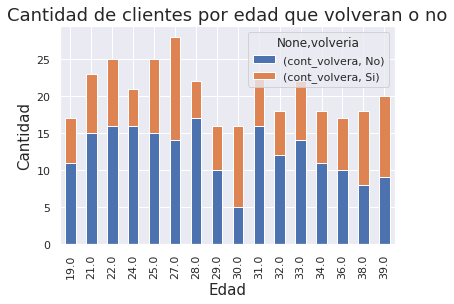

In [ ]:
'''
Grafico de barras de clientes por edad y sala.
'''
g = df_edad_volvera.plot.bar(stacked = True)
g.set_title("Cantidad de clientes por edad que volveran o no", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Edad", fontsize=15)

# Veamos cuantos clientes vuelven por sede

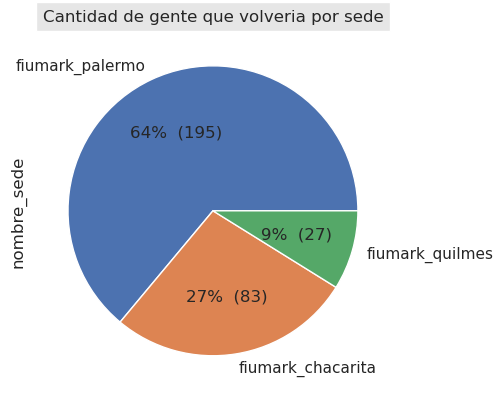

In [ ]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.0f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.figure(figsize=(6.4, 4.8), dpi=100)
df_volveria['nombre_sede'].value_counts().plot(
    kind='pie', autopct=make_autopct(df_volveria['nombre_sede'].value_counts())
)
plt.title("Cantidad de gente que volveria por sede", bbox={'facecolor':'0.9', 'pad':5})
plt.show()

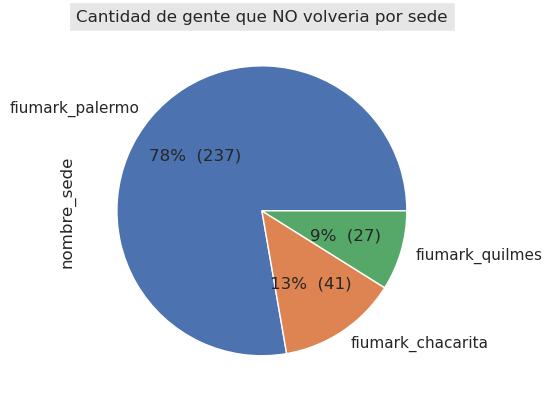

In [ ]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.0f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.figure(figsize=(6.4, 4.8), dpi=100)
df_no_volveria['nombre_sede'].value_counts().plot(
    kind='pie', autopct=make_autopct(df_volveria['nombre_sede'].value_counts())
)
plt.title("Cantidad de gente que NO volveria por sede", bbox={'facecolor':'0.9', 'pad':5})
plt.show()

Bueno, de estos sencillos graficos que vimos podemos sacar 2 conclusiones: 
    que de Palermo hay una sutil mayoria de gente que no volveria a ver frozen 4, pero en Chacarita 2 de cada 3 personas volverian. Finalmente no podemos decir nada de la sede Quilmes, esta 50-50
    
Indagaremos mas en esto en la siguiente seccion

# Heatmap de clientes por sede y tipo de sala

Ahora vamos a proceder a ver si la gente de alguna sede tiende mas a volver o no, por supuesto vamos a hacer esto tambien por tipo de sala

In [ ]:
df_volveria['aparicion'] = 1
for_heatmap = df_volveria.pivot_table(index='nombre_sede', columns='tipo_de_sala', values='aparicion', aggfunc='sum')

<ipython-input-43-02862def0eab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_volveria['aparicion'] = 1


In [ ]:
for_heatmap

tipo_de_sala       3d  4d  normal
nombre_sede                      
fiumark_chacarita   9  23      51
fiumark_palermo    71  58      66
fiumark_quilmes     2  24       1

Text(29.593749999999993, 0.5, 'Nombre sede')

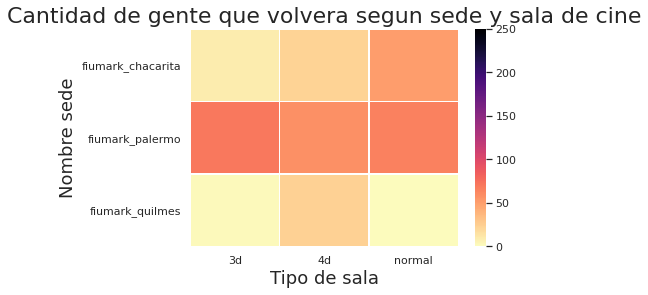

In [ ]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="magma_r", vmin=0, vmax=250) # annot=True
g.set_title("Cantidad de gente que volvera segun sede y sala de cine", fontsize=22)
g.set_xlabel("Tipo de sala",fontsize=18)
g.set_ylabel("Nombre sede", fontsize=18)

In [ ]:
df_no_volveria['aparicion'] = 1
for_heatmap_no = df_no_volveria.pivot_table(index='nombre_sede', columns='tipo_de_sala', values='aparicion', aggfunc='sum')

<ipython-input-46-23c1a524d20a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_volveria['aparicion'] = 1


Text(29.593749999999993, 0.5, 'Nombre sede')

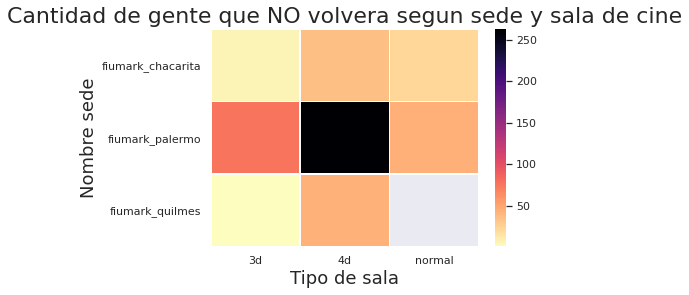

In [ ]:
g = sns.heatmap(for_heatmap_no, linewidths=.5, cmap="magma_r") # annot=True
g.set_title("Cantidad de gente que NO volvera segun sede y sala de cine", fontsize=22)
g.set_xlabel("Tipo de sala",fontsize=18)
g.set_ylabel("Nombre sede", fontsize=18)

Ok, de esto podemos sacar las siguientes conclusiones:

    1. de Fiubamark Quilmes:
    
        a. De la sala normal parece que todos volverian
        
        b. De la sala 4D hubo mas gente que NO volvera 
    
    2. de Fiubamark Palermo:
    
        a. De la sala 4D hay una GRAN cantidad de gente que NO volveria a ver Frozen 4
        
        b. De la sala normal, hay mas gente que va a volver a ver Frozen 4
        
    3. de Fiubamark Chacarita:
    
        a. De la sala normal hay mas gente que va a volver a ver Frozen 4
        
        b. De la sala 4D hay mas gente que NO va a voler a ver Frozen 4
       
De las salas 3D no podemos decir nada porque no se distingue realmente una diferencia, deberiamos verlo mas en detalle
para sacar una conclusion apropiada
    
    

# VER

las demas casillas no quedan muy claras, convendria usar un grafico extra para estos valores tan confusos?

Ahora detengamonos un momento a analizarla sede de Palermo 4D, mas que nada porque tiene un porcentage muy significativo de 
clientes. Hay algo mas que debamos analizar? Es decir, por ahi resulta que a la gente que va a esta sede y sala, 
tiene algun aspecto mas en comun, algo mas que debamos analizar. Entiendase esto con, por ejemplo, podria ser que la gente 
de 30 tiene una ampliar mayoria de gente que no quiere volver a ver Frozen 4, o quizas las mujeres tienen mayor interes por 
volver a ver la secuela. Todo esto recordemos lo hacemos por lo significante que es la cantidad de clientes de esta sala 
en particular en la sede de Palermo.

Analicemos primero por la edad de los clientes, a ver que podemos sacar de esto

In [ ]:
df_no_volveria.head()


tipo_de_sala                   nombre  genero  edad  amigos  parientes  \
0           4d       Señor Camilo Pedro  hombre  74.0       0          0   
1           4d   Señora Raquel Angelica   mujer  35.0       1          1   
2       normal   Señor Antonio Federico  hombre   NaN       0          0   
3           4d  Señor Osvaldo Aureliano  hombre   NaN       0          0   
5       normal   Señor Raimundo Longino  hombre   NaN       0          0   

   precio_ticket      fila        nombre_sede volveria  aparicion  
0              1       NaN    fiumark_quilmes       No          1  
1              2       NaN    fiumark_quilmes       No          1  
2              3       NaN  fiumark_chacarita       No          1  
3              1       NaN    fiumark_palermo       No          1  
5              4  adelante    fiumark_palermo       No          1

In [ ]:
df_palermo4d_volveria = df_volveria[(df_volveria['nombre_sede'] == 'fiumark_palermo') & (df_volveria['tipo_de_sala'] == '4d')]
df_palermo4d_volveria.head()

tipo_de_sala                     nombre  genero  edad  amigos  parientes  \
4            4d      Señorita Rita Eudosia   mujer   4.0       1          1   
14           4d  Señor Rubens Carlos Randy  hombre  29.0       0          0   
17           4d    Señorita Alicia Augusta   mujer  24.0       0          0   
21           4d             Señorita Sonia   mujer   7.0       1          1   
23           4d   Señora Rosalina Victoria   mujer  41.0       1          5   

    precio_ticket   fila      nombre_sede volveria  aparicion  
4               2    NaN  fiumark_palermo       Si          1  
14              6    NaN  fiumark_palermo       Si          1  
17              1    NaN  fiumark_palermo       Si          1  
21              2  medio  fiumark_palermo       Si          1  
23              4    NaN  fiumark_palermo       Si          1

In [ ]:
df_palermo4d_no_volveria = df_no_volveria[(df_no_volveria['nombre_sede'] == 'fiumark_palermo') & (df_no_volveria['tipo_de_sala'] == '4d')]
df_palermo4d_no_volveria.head()

tipo_de_sala                     nombre  genero  edad  amigos  parientes  \
3            4d    Señor Osvaldo Aureliano  hombre   NaN       0          0   
6            4d  Señor Celestino Wenceslao  hombre   NaN       3          1   
7            4d      Señor Carlos Gregorio  hombre  32.0       0          0   
11           4d    Señor Ernesto Reginaldo  hombre  27.0       0          0   
12           4d     Señor Paulino Virgilio  hombre  34.0       0          0   

    precio_ticket fila      nombre_sede volveria  aparicion  
3               1  NaN  fiumark_palermo       No          1  
6               3  NaN  fiumark_palermo       No          1  
7               1  NaN  fiumark_palermo       No          1  
11              1  NaN  fiumark_palermo       No          1  
12              1  NaN  fiumark_palermo       No          1

/home/juan/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/juan/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


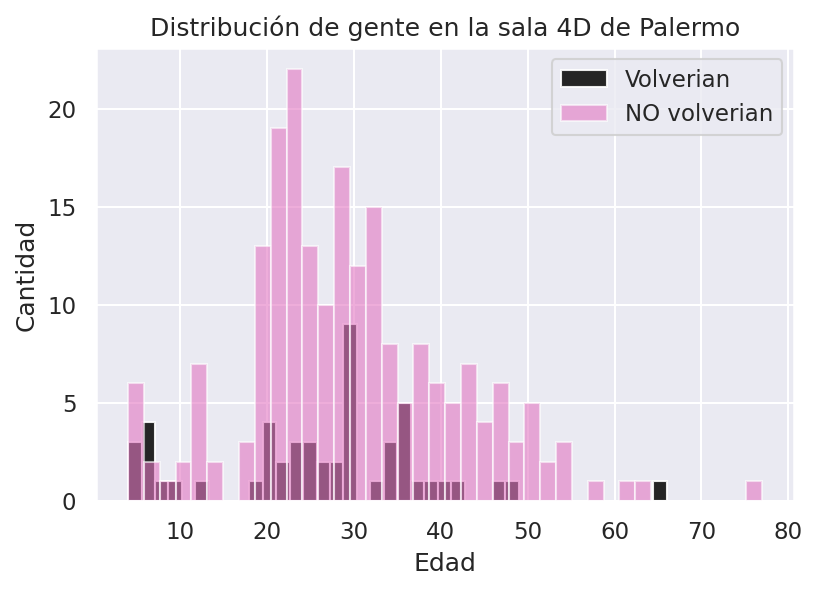

In [ ]:
plt.figure(dpi=150)

plt.hist(
    df_palermo4d_volveria['edad'],
    bins=40,
    label="Volverian",
    alpha=0.9, color='#0f0f0f80',
)
plt.hist(
    df_palermo4d_no_volveria['edad'],
    bins=40,
    label="NO volverian",
    alpha=0.6, 
    color = '#e377c2',
)
plt.title("Distribución de gente en la sala 4D de Palermo")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.legend()

plt.show()

Bueno de este grafico podemos ver que claramente no hay una predominancia significativa, por la edad, de si la gente 
quiere volver, en este contexto no cabe duda que los clientes de esta sala tienden a no querer volver, y esto es indistinto
de la edad.

In [ ]:
df_p4d_genero_voleria = df_palermo4d_volveria.groupby(by=['genero']).agg({"aparicion": "sum"})
df_p4d_genero_voleria = df_p4d_genero_voleria.reset_index()
df_p4d_genero_voleria.head(5)

genero  aparicion
0  hombre         30
1   mujer         28

In [ ]:
df_p4d_genero_no_voleria = df_palermo4d_no_volveria.groupby(by=['genero']).agg({"aparicion": "sum"})
df_p4d_genero_no_voleria = df_p4d_genero_no_voleria.reset_index()
df_p4d_genero_no_voleria.head(5)

genero  aparicion
0  hombre        210
1   mujer         53

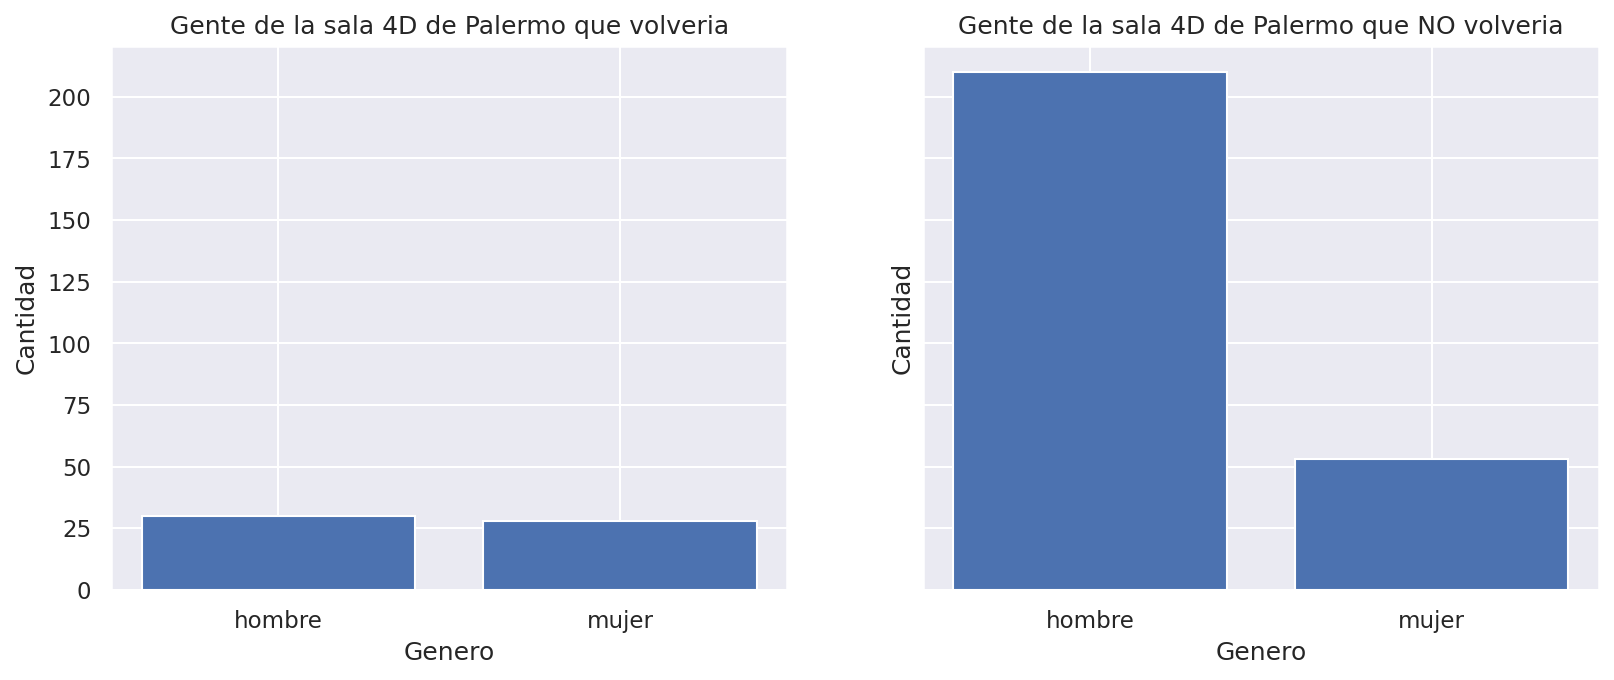

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, dpi=150, figsize=(6.4 * 2, 4.8))

axes[0].bar(df_p4d_genero_voleria['genero'], height=df_p4d_genero_voleria['aparicion'])
axes[0].set_title("Gente de la sala 4D de Palermo que volveria")
axes[0].set_xlabel("Genero")
axes[0].set_ylabel("Cantidad")

axes[1].bar(df_p4d_genero_no_voleria['genero'], height=df_p4d_genero_no_voleria['aparicion'])
axes[1].set_title("Gente de la sala 4D de Palermo que NO volveria")
axes[1].set_xlabel("Genero")
axes[1].set_ylabel("Cantidad")

plt.show()

Nuevamente  podemos ver que la gente en esta sala y sede, no tiene peso su genero a la hora de decidirse, por lo que nos
parece correcto asumir que si una persona va a sala 4D en la sede de Palermo, esta no volvera.

Sabemos que estos 2 ultimos graficos no aportaron realmente informacion mas alla de lo que ya sabiamos, pero preferimos
ver bien la informacion antes de sacar una conclusion con una muestra que bien podria estar sezgada.

Veamos un poco las salas 3D si podemos sacar algun dato

In [ ]:
df_3d_volveria = df_volveria[(df_volveria['tipo_de_sala'] == '3d')]
df_3d_sede_voleria = df_3d_volveria.groupby(by=['nombre_sede']).agg({"aparicion": "sum"})
df_3d_sede_voleria = df_3d_sede_voleria.reset_index()
df_3d_sede_voleria.head(5)

nombre_sede  aparicion
0  fiumark_chacarita          9
1    fiumark_palermo         71
2    fiumark_quilmes          2

In [ ]:
df_3d_no_volveria = df_no_volveria[(df_no_volveria['tipo_de_sala'] == '3d')]
df_3d_sede_no_voleria = df_3d_no_volveria.groupby(by=['nombre_sede']).agg({"aparicion": "sum"})
df_3d_sede_no_voleria = df_3d_sede_no_voleria.reset_index()
df_3d_sede_no_voleria.head(5)

nombre_sede  aparicion
0  fiumark_chacarita          7
1    fiumark_palermo         77
2    fiumark_quilmes          1

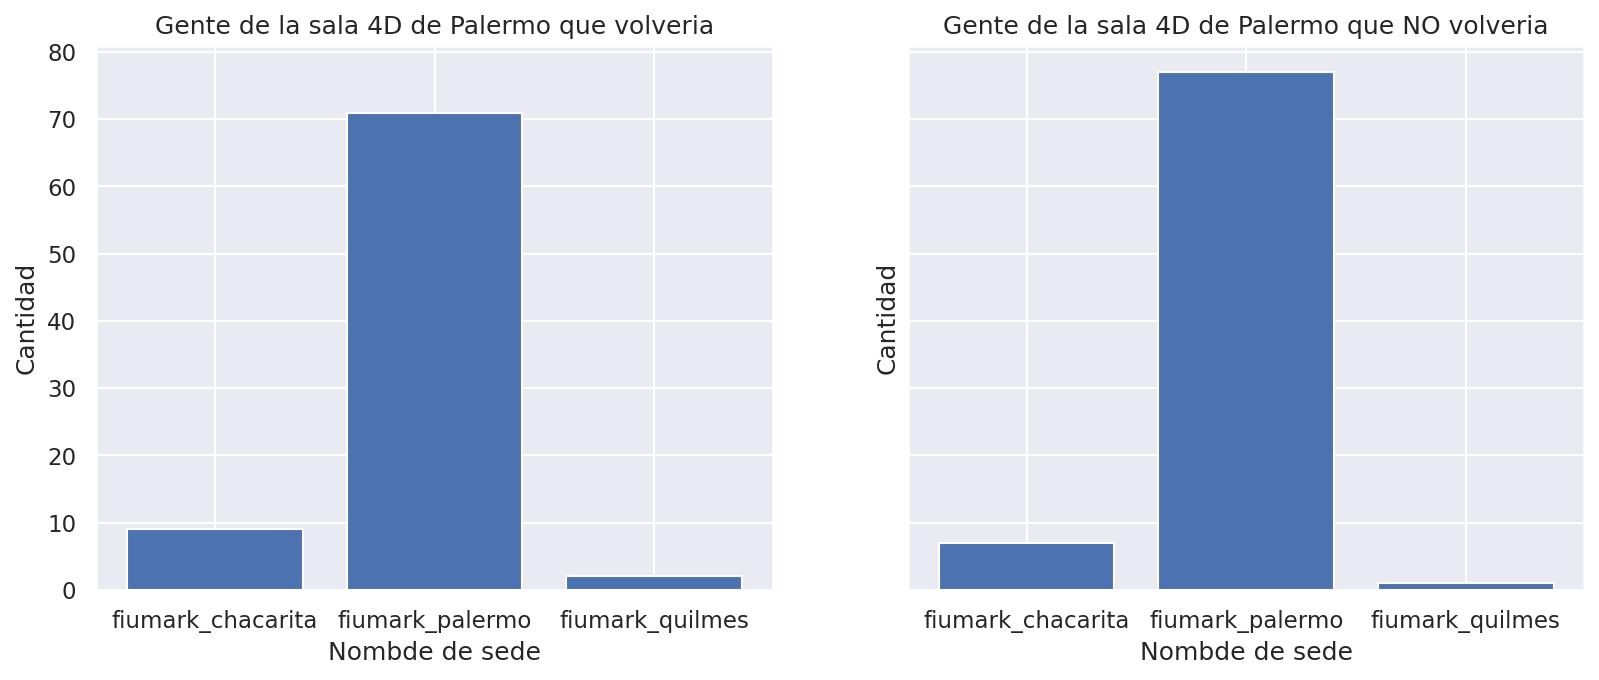

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, dpi=150, figsize=(6.4 * 2, 4.8))

axes[0].bar(df_3d_sede_voleria['nombre_sede'], height=df_3d_sede_voleria['aparicion'])
axes[0].set_title("Gente de la sala 4D de Palermo que volveria")
axes[0].set_xlabel("Nombde de sede")
axes[0].set_ylabel("Cantidad")

axes[1].bar(df_3d_sede_no_voleria['nombre_sede'], height=df_3d_sede_no_voleria['aparicion'])
axes[1].set_title("Gente de la sala 4D de Palermo que NO volveria")
axes[1].set_xlabel("Nombde de sede")
axes[1].set_ylabel("Cantidad")

plt.show()

Mmm ahora podemos ver que, por muy poco, los clientes de la sede Palermo prefieren no volver y las de chacarita y quilmes si
volverian, de cualquier forma no lo consideramos como un gran dato... estamos casi en un 50-50

# La gente vuelve en funcion de sus parientes o amigos?

Respondamos a la pregunta si la cantidad de gente con la que los clientes van, tiene una relacion con su decision de volver o no

In [ ]:
# Defino columna de acompaniantes para los que vuelven
df_volveria['aparicion'] = 1
df_volveria['cant_acompañado'] = df_volveria['parientes'] + df_volveria['amigos']
df_volveria.head(5)

<ipython-input-58-c0d37ee6faef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_volveria['aparicion'] = 1
<ipython-input-58-c0d37ee6faef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_volveria['cant_acompañado'] = df_volveria['parientes'] + df_volveria['amigos']


tipo_de_sala                          nombre  genero  edad  amigos  \
4            4d           Señorita Rita Eudosia   mujer   4.0       1   
8        normal  Señor Carlos Roberto Francisco  hombre  41.0       1   
9        normal          Señora Lidia Barbarita   mujer  59.0       0   
13           3d         Señora Bernarda Agapita   mujer  45.0       0   
14           4d       Señor Rubens Carlos Randy  hombre  29.0       0   

    parientes  precio_ticket      fila        nombre_sede volveria  aparicion  \
4           1              2       NaN    fiumark_palermo       Si          1   
8           0              9  adelante    fiumark_palermo       Si          1   
9           1              9  adelante  fiumark_chacarita       Si          1   
13          0              2       NaN    fiumark_palermo       Si          1   
14          0              6       NaN    fiumark_palermo       Si          1   

    cant_acompañado  
4                 2  
8                 1  
9                 1  
13                0  
14                0

In [ ]:
# # Defino columna de acompaniantes para los que NO vuelven
df_amigos_volveria = df_volveria.groupby(by=['amigos']).agg({"aparicion": "sum"})
df_amigos_volveria = df_amigos_volveria.reset_index()
df_amigos_volveria.head(5)

amigos  aparicion
0       0        194
1       1         95
2       2         13
3       3          3
4       4          2

In [ ]:
df_no_volveria['aparicion'] = 1
df_no_volveria['cant_acompañado'] = df_no_volveria['parientes'] + df_no_volveria['amigos']
df_no_volveria.head(5)

<ipython-input-60-55a2a152c16e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_volveria['aparicion'] = 1
<ipython-input-60-55a2a152c16e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_volveria['cant_acompañado'] = df_no_volveria['parientes'] + df_no_volveria['amigos']


tipo_de_sala                   nombre  genero  edad  amigos  parientes  \
0           4d       Señor Camilo Pedro  hombre  74.0       0          0   
1           4d   Señora Raquel Angelica   mujer  35.0       1          1   
2       normal   Señor Antonio Federico  hombre   NaN       0          0   
3           4d  Señor Osvaldo Aureliano  hombre   NaN       0          0   
5       normal   Señor Raimundo Longino  hombre   NaN       0          0   

   precio_ticket      fila        nombre_sede volveria  aparicion  \
0              1       NaN    fiumark_quilmes       No          1   
1              2       NaN    fiumark_quilmes       No          1   
2              3       NaN  fiumark_chacarita       No          1   
3              1       NaN    fiumark_palermo       No          1   
5              4  adelante    fiumark_palermo       No          1   

   cant_acompañado  
0                0  
1                2  
2                0  
3                0  
5                0

In [ ]:
df_amigos_no_volveria = df_no_volveria.groupby(by=['amigos']).agg({"aparicion": "sum"})
df_amigos_no_volveria = df_amigos_no_volveria.reset_index()
df_amigos_no_volveria.head(5)

amigos  aparicion
0       0        363
1       1         84
2       2         12
3       3         11
4       4         13

In [ ]:
"""fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, dpi=150, figsize=(6.4 * 2, 4.8))

axes[0].bar(df_amigos_volveria['amigos'], height=df_amigos_volveria['aparicion'])
axes[0].set_title("Gente que volveria segun su cantidad de amigos")
axes[0].set_xlabel("Cantidad de amigos con los que fueron")
axes[0].set_ylabel("Cantidad")

axes[1].bar(df_amigos_no_volveria['amigos'], height=df_amigos_no_volveria['aparicion'])
axes[1].set_title("Gente que NO volveria segun su cantidad de amigos")
axes[1].set_xlabel("antidad de amigos con los que fueron")
axes[1].set_ylabel("Cantidad")
"""

'fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, dpi=150, figsize=(6.4 * 2, 4.8))\n\naxes[0].bar(df_amigos_volveria[\'amigos\'], height=df_amigos_volveria[\'aparicion\'])\naxes[0].set_title("Gente que volveria segun su cantidad de amigos")\naxes[0].set_xlabel("Cantidad de amigos con los que fueron")\naxes[0].set_ylabel("Cantidad")\n\naxes[1].bar(df_amigos_no_volveria[\'amigos\'], height=df_amigos_no_volveria[\'aparicion\'])\naxes[1].set_title("Gente que NO volveria segun su cantidad de amigos")\naxes[1].set_xlabel("antidad de amigos con los que fueron")\naxes[1].set_ylabel("Cantidad")\n'

# Por familiares

In [ ]:
# gente que volveria por parientes
df_parientes_volveria = df_volveria.groupby(by=['parientes']).agg({"aparicion": "sum"})
df_parientes_volveria = df_parientes_volveria.reset_index()
df_parientes_volveria.head(5)

parientes  aparicion
0          0        209
1          1         60
2          2         34
3          3          3
4          5          1

In [ ]:
# gente que NO volveria por parientes
df_parientes_no_volveria = df_no_volveria.groupby(by=['parientes']).agg({"aparicion": "sum"})
df_parientes_no_volveria = df_parientes_no_volveria.reset_index()
df_parientes_no_volveria.head(5)

parientes  aparicion
0          0        398
1          1         50
2          2         36
3          3          2
4          4          4

In [ ]:
# gente que volveria por companieros
df_acompañado_volveria = df_volveria.groupby(by=['cant_acompañado']).agg({"aparicion": "sum"})
df_acompañado_volveria = df_acompañado_volveria.reset_index()
df_acompañado_volveria.head(5)

cant_acompañado  aparicion
0                0        151
1                1         78
2                2         50
3                3         19
4                4          3

In [ ]:
# gente que NO volveria por companieros
df_acompañado_no_volveria = df_no_volveria.groupby(by=['cant_acompañado']).agg({"aparicion": "sum"})
df_acompañado_no_volveria = df_acompañado_no_volveria.reset_index()
df_acompañado_no_volveria.head(5)

cant_acompañado  aparicion
0                0        342
1                1         59
2                2         38
3                3          8
4                4         11

Text(0, 0.5, 'Cantidad de clientes')

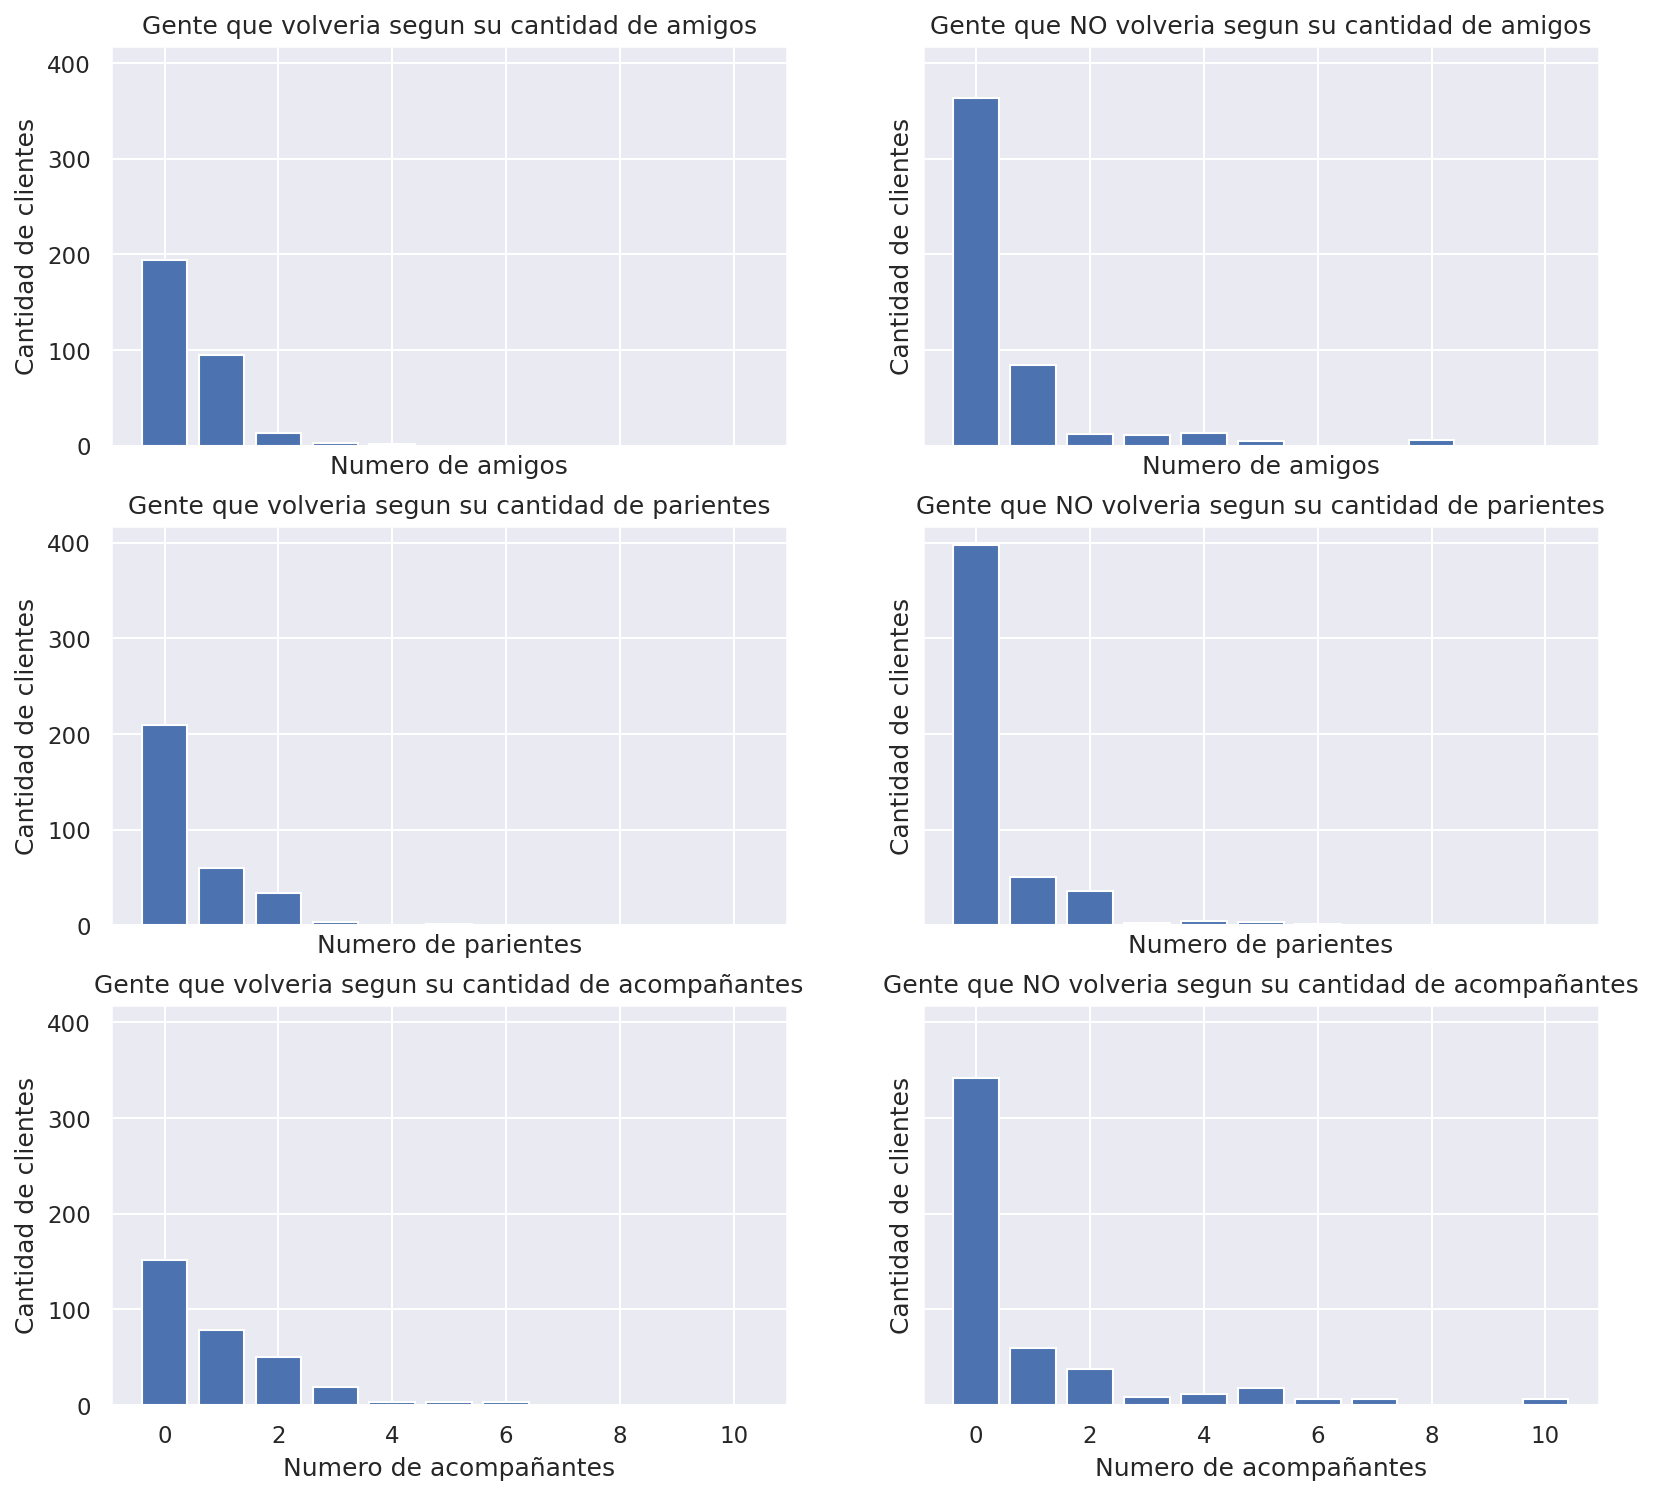

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharey=True, sharex=True, dpi=150, figsize=(6.4 * 2, 12))

axes[0][0].bar(df_amigos_volveria['amigos'], height=df_amigos_volveria['aparicion'])
axes[0][0].set_title("Gente que volveria segun su cantidad de amigos")
axes[0][0].set_xlabel("Numero de amigos")
axes[0][0].set_ylabel("Cantidad de clientes")

axes[0][1].bar(df_amigos_no_volveria['amigos'], height=df_amigos_no_volveria['aparicion'])
axes[0][1].set_title("Gente que NO volveria segun su cantidad de amigos")
axes[0][1].set_xlabel("Numero de amigos")
axes[0][1].set_ylabel("Cantidad de clientes")

axes[1][0].bar(df_parientes_volveria['parientes'], height=df_parientes_volveria['aparicion'])
axes[1][0].set_title("Gente que volveria segun su cantidad de parientes")
axes[1][0].set_xlabel("Numero de parientes")
axes[1][0].set_ylabel("Cantidad de clientes")

axes[1][1].bar(df_parientes_no_volveria['parientes'], height=df_parientes_no_volveria['aparicion'])
axes[1][1].set_title("Gente que NO volveria segun su cantidad de parientes")
axes[1][1].set_xlabel("Numero de parientes")
axes[1][1].set_ylabel("Cantidad de clientes")

axes[2][0].bar(df_acompañado_volveria['cant_acompañado'], height=df_acompañado_volveria['aparicion'])
axes[2][0].set_title("Gente que volveria segun su cantidad de acompañantes")
axes[2][0].set_xlabel("Numero de acompañantes")
axes[2][0].set_ylabel("Cantidad de clientes")

axes[2][1].bar(df_acompañado_no_volveria['cant_acompañado'], height=df_acompañado_no_volveria['aparicion'])
axes[2][1].set_title("Gente que NO volveria segun su cantidad de acompañantes")
axes[2][1].set_xlabel("Numero de acompañantes")
axes[2][1].set_ylabel("Cantidad de clientes")


Nuevamente no podemos decir nada respecto a esto, no podemos decir que la cantidad de gente con la que van los clientes
influya en lo mas minimo en su decision

# Por precio

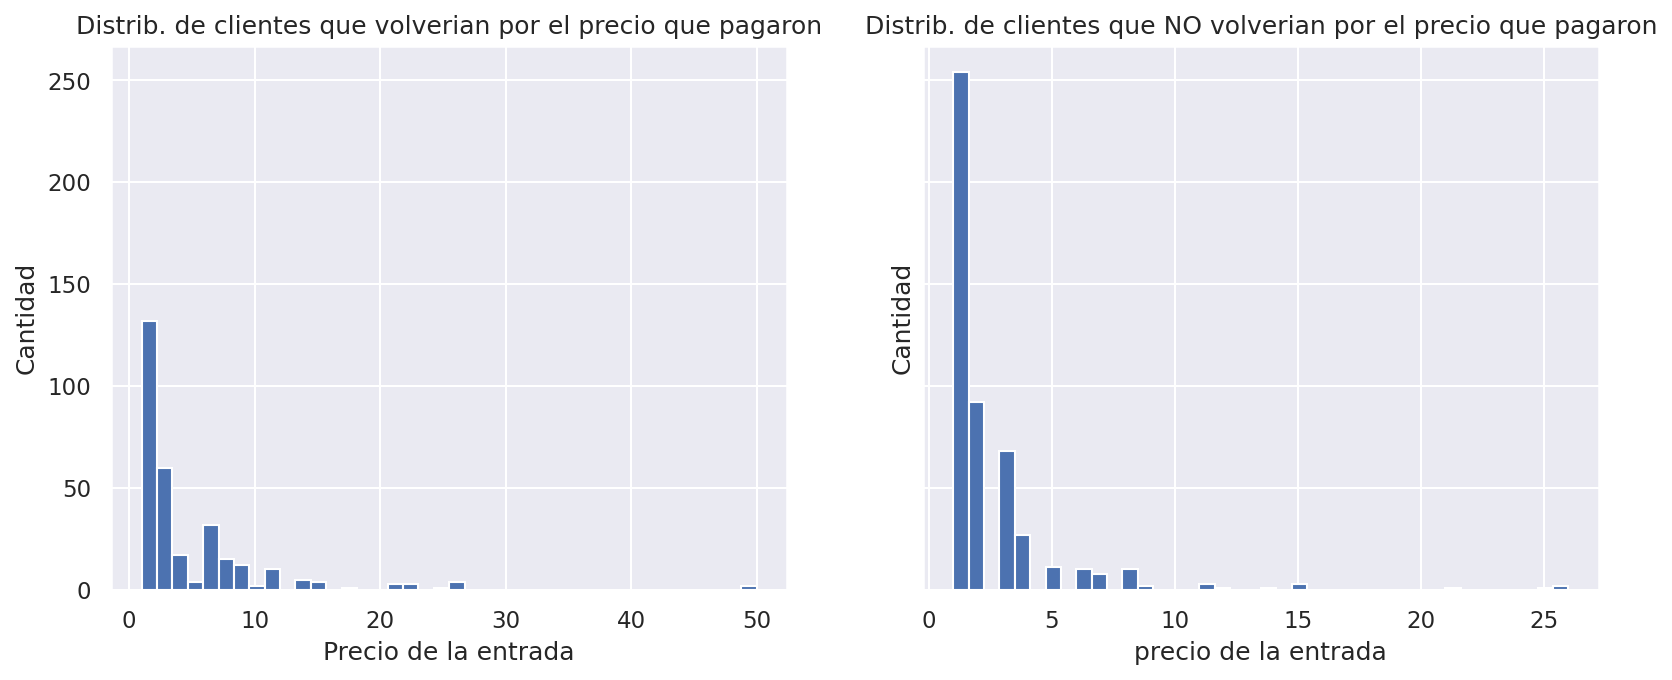

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, dpi=150, figsize=(6.4 * 2, 4.8))

axes[0].hist(df_volveria['precio_ticket'], bins=40)
axes[0].set_title("Distrib. de clientes que volverian por el precio que pagaron")
axes[0].set_xlabel("Precio de la entrada")
axes[0].set_ylabel("Cantidad")

axes[1].hist(df_no_volveria['precio_ticket'], bins=40)
axes[1].set_title("Distrib. de clientes que NO volverian por el precio que pagaron")
axes[1].set_xlabel("precio de la entrada")
axes[1].set_ylabel("Cantidad")

plt.show()